# 函式庫導入

In [7]:
import sqlparse
import textwrap
from matplotlib import pyplot as plt

In [8]:
def get_fm_sql(file_path:str) -> str:

    '''
    Get formatted sql from file

    Parameters
    ----------
    file_path : str

    Returns
    -------
    indent_str : str
    '''

    with open(file_path, encoding='utf-8') as file:
        content = file.read()
        str_sql = sqlparse.format(content, reindent=True, keyword_case='upper')
        str_sql = str_sql.strip(' \t\n;')
        indent_str = textwrap.indent(str_sql, "  ")
    return indent_str

In [9]:
sql = get_fm_sql('./exam.sql')
sql

"  SELECT CASE\n             WHEN tStock_In.shop IS NULL THEN tSale_qty.shop\n             ELSE tStock_In.shop\n         END AS shop,\n         CASE\n             WHEN tStock_In.prod IS NULL THEN tSale_qty.prod\n             ELSE tStock_In.prod\n         END AS prod,\n         pos110.pname,\n         pos110.pluno,\n         pos116.lprc,\n         CASE\n             WHEN tStock_In.stock_qty IS NULL THEN 0\n             ELSE tStock_In.stock_qty\n         END AS pre_stock_qty,\n         CASE\n             WHEN tStock_In.in_qty IS NULL THEN 0\n             ELSE tStock_In.in_qty\n         END AS in_qty,\n         CASE\n             WHEN tSale_qty.sale_qty IS NULL THEN 0\n             ELSE tSale_qty.sale_qty\n         END AS sale_qty,\n         CASE\n             WHEN tSale_qty.sale_qty IS NULL THEN (tStock_In.stock_qty + tStock_In.in_qty)\n             WHEN tStock_In.stock_qty IS NULL\n                  AND tStock_In.in_qty IS NULL THEN -tSale_qty.sale_qty\n             ELSE (tStock_In.stoc

# SQL parsing break down

In [13]:
parse = sqlparse.parse(sql)

In [14]:
for stmt in parse:
    print(stmt._pprint_tree())
    print('------------------')

|- 0 Whitespace ' '
|- 1 Whitespace ' '
|- 2 DML 'SELECT'
|- 3 Whitespace ' '
|- 4 IdentifierList 'CASE ...'
|  |- 0 Identifier 'CASE ...'
|  |  |- 0 Case 'CASE ...'
|  |  |  |- 0 Keyword 'CASE'
|  |  |  |- 1 Newline ' '
|  |  |  |- 2 Whitespace ' '
|  |  |  |- 3 Whitespace ' '
|  |  |  |- 4 Whitespace ' '
|  |  |  |- 5 Whitespace ' '
|  |  |  |- 6 Whitespace ' '
|  |  |  |- 7 Whitespace ' '
|  |  |  |- 8 Whitespace ' '
|  |  |  |- 9 Whitespace ' '
|  |  |  |- 10 Whitespace ' '
|  |  |  |- 11 Whitespace ' '
|  |  |  |- 12 Whitespace ' '
|  |  |  |- 13 Whitespace ' '
|  |  |  |- 14 Whitespace ' '
|  |  |  |- 15 Keyword 'WHEN'
|  |  |  |- 16 Whitespace ' '
|  |  |  |- 17 Identifier 'tStock...'
|  |  |  |  |- 0 Name 'tStock...'
|  |  |  |  |- 1 Punctuation '.'
|  |  |  |  `- 2 Name 'shop'
|  |  |  |- 18 Whitespace ' '
|  |  |  |- 19 Keyword 'IS'
|  |  |  |- 20 Whitespace ' '
|  |  |  |- 21 Keyword 'NULL'
|  |  |  |- 22 Whitespace ' '
|  |  |  |- 23 Keyword 'THEN'
|  |  |  |- 24 Whitespace

<DML 'SELECT' at 0x1279AF340>

In [68]:
for token in parse[0].tokens:
    print('-')
    print(token.ttype, token.value)
# Loop through the WHERE clause tokens and print each one
from_clause = None
for token in parse[0].tokens:
  if token.ttype is sqlparse.tokens.Keyword and token.value.upper() == 'FROM':
  	from_clause = token
print(from_clause)
# if from_clause:
#   for token in from_clause.tokens:
#   	print(token.ttype, token.value)

-
Token.Text.Whitespace.Newline 

-
Token.Keyword.DML SELECT
-
Token.Text.Whitespace  
-
None c.first_name,
       c.last_name,
       o.order_id,
       o.total_amount
-
Token.Text.Whitespace.Newline 

-
Token.Keyword FROM
-
Token.Text.Whitespace  
-
None customers c
-
Token.Text.Whitespace.Newline 

-
Token.Keyword JOIN
-
Token.Text.Whitespace  
-
None orders o
-
Token.Text.Whitespace  
-
Token.Keyword ON
-
Token.Text.Whitespace  
-
None c.customer_id = o.customer_id
-
Token.Text.Whitespace.Newline 

-
None WHERE o.total_amount >
    (SELECT AVG(total_amount)
     FROM orders
     WHERE customer_id IN
         (SELECT customer_id
          FROM customers
          WHERE last_name = 'Doe' ) );
FROM


In [33]:
def extract_table_relationships(parsed_query):
    relationships = []

    for stmt in parsed_query:
        join_clause = None
        on_clause = None

        for token in stmt.tokens:
            if token.is_keyword and token.value.upper() == 'JOIN':
                join_clause = token

            if join_clause and token.is_keyword and token.value.upper() == 'ON':
                on_clause = token

        if join_clause and on_clause:
            # Extract table names from JOIN clause
            tables = [t.get_real_name() for t in join_clause.tokens if t.ttype is None]
            relationships.append((tables[0].strip(), tables[1].strip(), 'INNER JOIN'))

            # Extract conditions from ON clause
            conditions = [t.get_real_name() for t in on_clause.tokens if t.ttype is None]
            relationships.append(('ON', conditions))

    return relationships

In [46]:
# Parse the SQL query
parsed_query = sqlparse.parse(sql_query)

relationships = []
for stmt in parsed_query:
    join_clause = None
    on_clause = None
    n=0
    for token in stmt.tokens:
        print(n)
        print(token)
        n+=1
        # Extract table names from JOIN clause
        # tables = [t.get_real_name() for t in join_clause.tokens if t.ttype is None]
        # relationships.append((tables[0].strip(), tables[1].strip(), 'INNER JOIN'))

        # # Extract conditions from ON clause
        # conditions = [t.get_real_name() for t in on_clause.tokens if t.ttype is None]
        # relationships.append(('ON', conditions))


0


1
SELECT
2
 
3


4
 
5
 
6
 
7
 
8
c.first_name,
    c.last_name,
    o.order_id,
    o.total_amount
9


10
FROM
11
 
12


13
 
14
 
15
 
16
 
17
customers c
18


19
JOIN
20
 
21


22
 
23
 
24
 
25
 
26
orders o
27
 
28
ON
29
 
30
c.customer_id = o.customer_id
31


32
WHERE 
    o.total_amount > (
        SELECT 
            AVG(total_amount)
        FROM 
            orders
        WHERE 
            customer_id IN (
                SELECT 
                    customer_id
                FROM 
                    customers
                WHERE 
                    last_name = 'Doe'
            )
    );


In [45]:
join_clause.value

'JOIN'

In [34]:
# Parse the SQL query
parsed_query = sqlparse.parse(sql_query)

# Extract table relationships
relationships = extract_table_relationships(parsed_query)

# Print the relationships
for relationship in relationships:
    print(relationship)


AttributeError: 'Token' object has no attribute 'tokens'

# ERD 繪製

In [22]:
statements = sqlparse.parse(sql)
section = statements[0]
for token in section.tokens:
    print(token.ttype,' , ', token.value)

Token.Text.Whitespace.Newline  ,  

Token.Keyword.DDL  ,  CREATE
Token.Text.Whitespace  ,   
Token.Keyword  ,  TABLE
Token.Text.Whitespace  ,   
None  ,  Customer
Token.Text.Whitespace  ,   
None  ,  (
        customer_id INT PRIMARY KEY,
        first_name VARCHAR(50),
        last_name VARCHAR(50)
    )
Token.Punctuation  ,  ;


In [17]:
n=0
for content in statements:
    print(n)
    print(content)
    n+=1

0

CREATE TABLE Customer (
        customer_id INT PRIMARY KEY,
        first_name VARCHAR(50),
        last_name VARCHAR(50)
    );
1


    CREATE TABLE Order (
        order_id INT PRIMARY KEY,
        order_date DATE,
        customer_id INT,
        FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
    );


AttributeError: 'tuple' object has no attribute 'token'

In [8]:
sqlparse.split(sql)

['CREATE TABLE Customer (\n        customer_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50)\n    );',
 'CREATE TABLE Order (\n        order_id INT PRIMARY KEY,\n        order_date DATE,\n        customer_id INT,\n        FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)\n    );']

AttributeError: 'tuple' object has no attribute 'tokens'

In [11]:
for statement in statements:
    if statement.get_type() == 'CREATE':
        tokens = statement.tokens        
        entity_name = None
        attributes = []
        for token in tokens:
            
            if token.ttype == sqlparse.tokens.Keyword and token.value.upper() == 'TABLE':
                entity_name = tokens[tokens.index(token) + 2].get_real_name()
            if token.ttype == sqlparse.tokens.Keyword and token.value.upper() == 'FOREIGN':
                fk_column = tokens[tokens.index(token) + 2].get_real_name()
                ref_table = tokens[tokens.index(token) + 6].get_real_name()
                ref_column = tokens[tokens.index(token) + 8].get_real_name()
                relationships.append((entity_name, ref_table, fk_column, ref_column))
            if token.ttype == sqlparse.tokens.Keyword and token.value.upper() == 'PRIMARY':
                pk_column = tokens[tokens.index(token) + 6].get_real_name()
                attributes.append(pk_column)
            if token.ttype == sqlparse.tokens.Name and tokens[tokens.index(token) + 1].value.upper() == 'VARCHAR':
                attributes.append(token.get_real_name())
        tables.append((entity_name, attributes))

AttributeError: 'Token' object has no attribute 'get_real_name'

In [23]:
#導入套件，開始使用的前置步驟
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
#新增一個點 A，顯示名稱為 QQ
dot.node('A', label = 'QQ') 
#新增一個點 B，顯示名稱為 www
dot.node('B', label = 'www')
#新增一個從點 A 到點 B 的邊，顯示名稱為 Like
dot.edge("A", "B", label = "Like")

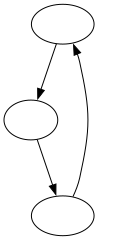

In [24]:
dot = Digraph(comment='The Round Table')
names = ['剪刀', '石頭', '布']
for i in names:  #新增三個結點，分別叫做剪刀石頭布
    dot.node(i, i)
for i in range(len(names)): #將互相克制的關係畫上去
    dot.edge(names[i], names[i-1], "克制")
dot
